<a href="https://colab.research.google.com/github/shreyaghotankar/CMPE-255-Data-Mining/blob/master/CMPE255_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning Practice Exercise**


*   Pick a kaggle data set which might be fairly noisy
*   Write a data cleaning and preprocessing  and visualization colab using any data set
*   Train a model (optional)

### **Dataset** - [Hotel Bookings](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

In [1]:
# importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn import metrics

#### **Data loading and pre-processing**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CMPE255 - Data Mining/Assignments/hotel_bookings.csv')


In [3]:
# display all columns
pd.set_option('display.max_columns', None) 

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Checking the dataset rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# assessing data
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [6]:
# finding any data is missing or NaN
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [7]:
# Drop company column as it has the maximum NaN values low impact
df.drop('company',axis=1,inplace=True)

In [8]:
# fill missing agent values with 0.0
#df['agent'].fillna(value=0.0, inplace = True)

# Drop agent column as well as it has 2nd maximum null values
df.drop('agent',axis=1,inplace=True)

# fill missing children values with mean
df['children'].fillna(value=round(df.children.mean()), inplace= True)

In [9]:
df.isna().sum().sort_values(ascending=False)

country                           488
reservation_status_date             0
reservation_status                  0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr         

In [10]:
# replace nan values in country column with country that is most frequent in the dataset
df['country'].fillna(df.country.mode().to_string(), inplace=True)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.isna().sum().sort_values(ascending=False)

reservation_status_date           0
reservation_status                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [12]:
# finding duplicate data
print('Number of Duplicate rows = ', (df.duplicated()).sum())

Number of Duplicate rows =  32020


In [13]:
# dropping all duplicate data
df.drop_duplicates(keep=False,inplace=True)

(df.duplicated()).sum()

0

In [14]:
# check dataset datatypes
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [15]:
# changing children column from float to int
df['children'] = df['children'].astype(int)

#### **Analyzing Data**

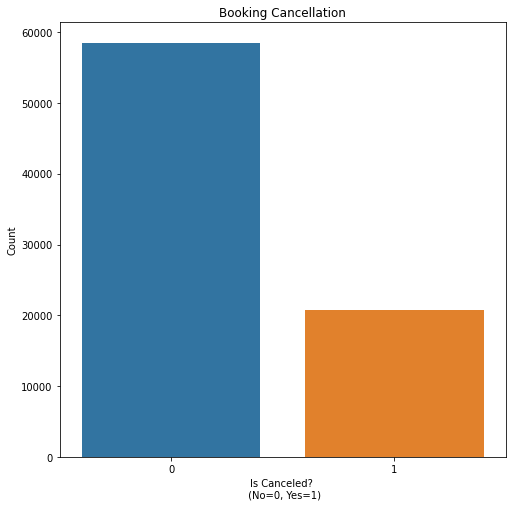

In [16]:
# Checking Booking cancellations
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation')
plt.xlabel('Is Canceled? \n (No=0, Yes=1)')
plt.ylabel('Count')
plt.show()

In [17]:
# checking unique values for hotel, customer type
print('Hotel types: ',df.hotel.unique())
print('\nCustomer Types: ',df.customer_type.unique())

Hotel types:  ['Resort Hotel' 'City Hotel']

Customer Types:  ['Transient' 'Contract' 'Transient-Party' 'Group']


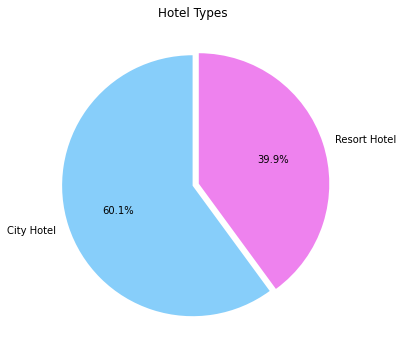

In [18]:
# pie chart for hotel types
fig = plt.figure(figsize = (6,6))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = False, startangle = 90, explode=(0,0.05),
        colors=['lightskyblue','violet'])

plt.title('Hotel Types')
plt.show()

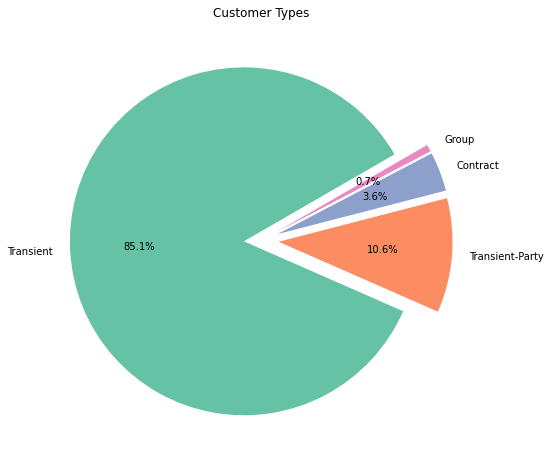

In [19]:
# Plotting Customer Types
fig = plt.figure(figsize = (8,8))
labels = df['customer_type'].value_counts().index.tolist()
sizes = df['customer_type'].value_counts().tolist()
colors = sns.color_palette('Set2')
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = False, startangle = 30, colors=colors, explode=(0.1,0.1,0.1,0.1))

plt.title('Customer Types')
plt.show()

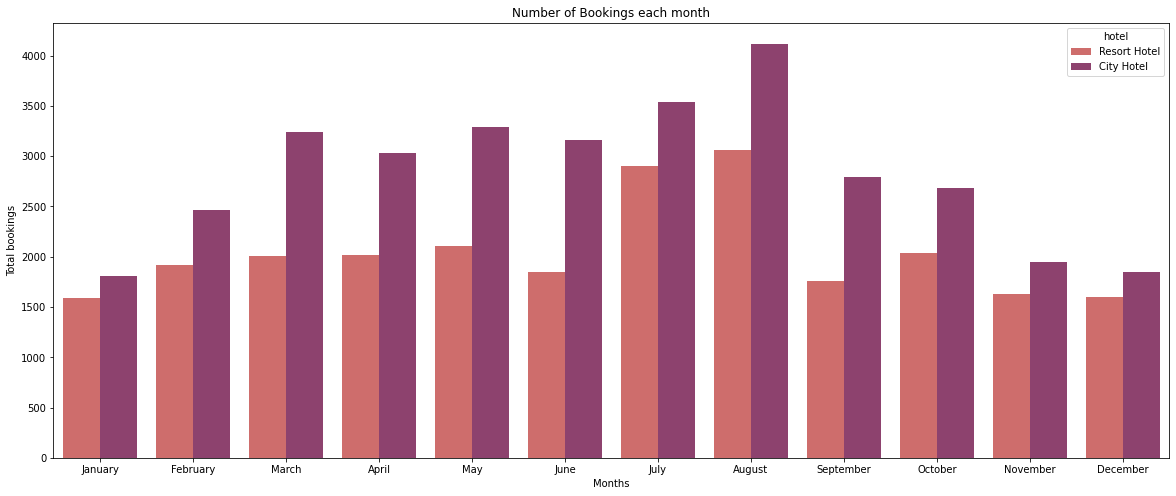

In [20]:
# Bookings per month for different hotel types
df_notcanceled = df[df['is_canceled'] == 0].copy()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(20,8))
sns.countplot(data=df_notcanceled, x='arrival_date_month', hue='hotel', order=month_order, palette='flare')
plt.xlabel('Months')
plt.ylabel('Total bookings')
plt.title('Number of Bookings each month')

plt.show()

#### **Feature Engineering**

In [21]:
# Min and Max of average daily rate
print('Max Price:', df['adr'].max())
print('\nMin Price:', df['adr'].min())

Max Price: 5400.0

Min Price: -6.38


In [22]:
# Calculating Total Number of Guests
df['total_guest'] = df['adults']+ df['children']+ df['babies']

df['total_guest'].describe()

count    79182.000000
mean         2.047321
std          0.814269
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: total_guest, dtype: float64

In [23]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df['total_nights'].describe()

count    79182.000000
mean         3.672312
std          2.811809
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: total_nights, dtype: float64

In [24]:
# average daily rate per person
df['adr_pp'] = df['adr']/(df['total_guest'])

df_subset = df[df['is_canceled'] == 0].copy()

# total price
df_subset['price'] = df_subset['adr'] * df['total_nights']



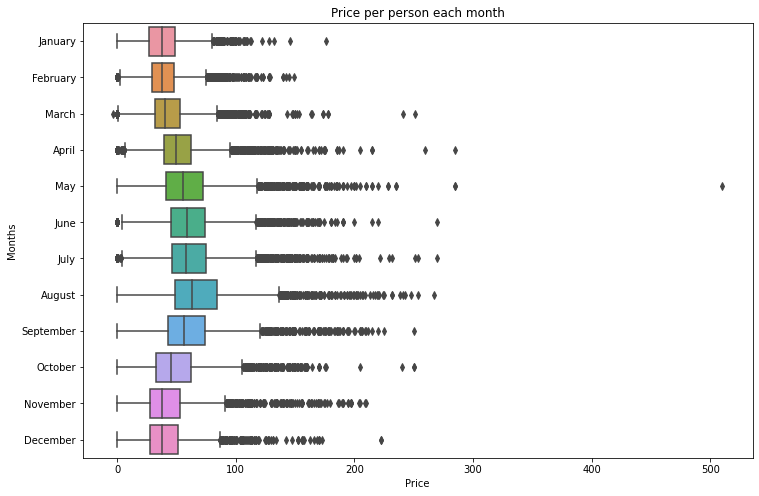

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df_subset, y='arrival_date_month', x ='adr_pp', order=month_order)
plt.title('Price per person each month')
plt.xlabel('Price')
plt.ylabel('Months')

plt.show()

Not much difference in overall prices for hotel stays across months.

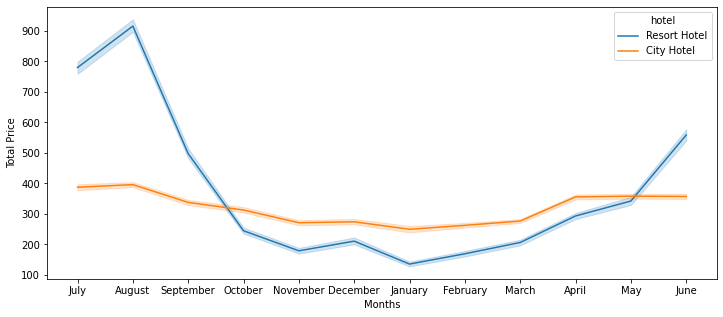

In [26]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df_subset, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.xlabel('Months')
plt.ylabel('Total Price')

plt.show()

#### **Feature Selection**

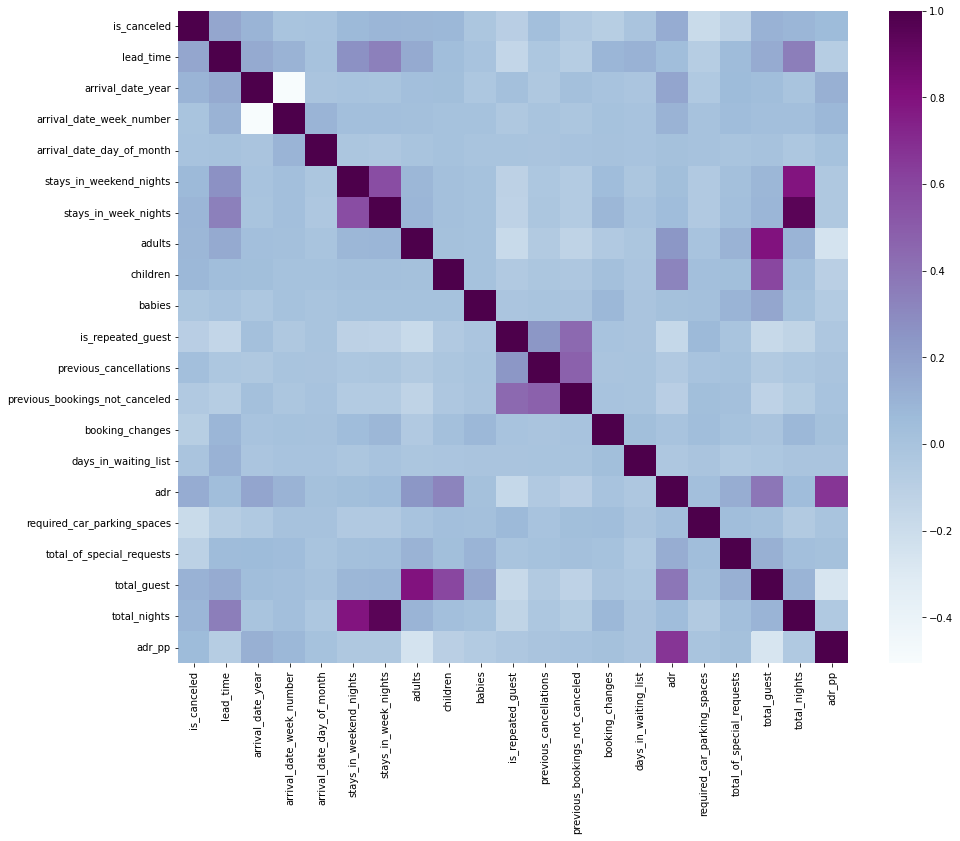

In [27]:
plt.figure(figsize=(15,12))
cormat = df.corr()
sns.heatmap(cormat, cmap='BuPu');

Using this dataset, we can predict the cancellations. For training a model we need to pick features which can be done with the help of correlation matrix heatmap.

In [28]:
# correlation specific to is_canceled column
feat_corr = df.corr()['is_canceled']

print(feat_corr.abs().sort_values(ascending=False))

is_canceled                       1.000000
required_car_parking_spaces       0.187053
lead_time                         0.169680
adr                               0.139288
total_guest                       0.108900
total_of_special_requests         0.108721
arrival_date_year                 0.096586
total_nights                      0.093224
is_repeated_guest                 0.092973
stays_in_week_nights              0.092141
booking_changes                   0.086602
adults                            0.085241
children                          0.077147
stays_in_weekend_nights           0.067125
adr_pp                            0.059107
previous_bookings_not_canceled    0.052975
previous_cancellations            0.030573
babies                            0.019616
days_in_waiting_list              0.006772
arrival_date_day_of_month         0.004336
arrival_date_week_number          0.000610
Name: is_canceled, dtype: float64


#### **Model Training**

In [31]:
from sklearn.model_selection import train_test_split

In [39]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print('Columns with object dtypes: \n', categorical_columns)

Columns with object dtypes: 
 ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [40]:
num_col = df.select_dtypes(include='number').columns.tolist()
print('Columns with numeric dtypes: \n', num_col)

Columns with numeric dtypes: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guest', 'total_nights', 'adr_pp']


In [41]:
# creating subset of dataset
columns = ['hotel', 'is_canceled', 'lead_time', 'adults', 'children', 'babies',
           'market_segment', 'distribution_channel', 'reserved_room_type',
           'assigned_room_type', 'deposit_type', 'meal', 'is_repeated_guest', 
           'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 
           'adr', 'required_car_parking_spaces', 'total_of_special_requests', 
           'total_guest', 'country']

df_1 = df[columns].copy()

df_1.head()

,hotel,is_canceled,lead_time,adults,children,babies,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,meal,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest,country
0,Resort Hotel,0,342,2,0,0,Direct,Direct,C,C,No Deposit,BB,0,0,3,0,0.0,0,0,2,PRT
1,Resort Hotel,0,737,2,0,0,Direct,Direct,C,C,No Deposit,BB,0,0,4,0,0.0,0,0,2,PRT
2,Resort Hotel,0,7,1,0,0,Direct,Direct,A,C,No Deposit,BB,0,0,0,0,75.0,0,0,1,GBR
3,Resort Hotel,0,13,1,0,0,Corporate,Corporate,A,A,No Deposit,BB,0,0,0,0,75.0,0,0,1,GBR
6,Resort Hotel,0,0,2,0,0,Direct,Direct,C,C,No Deposit,BB,0,0,0,0,107.0,0,0,2,PRT


In [42]:
cat_cols = df_1.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
df_1[cat_cols] = df_1[cat_cols].apply(lambda x: le.fit_transform(x))

df_1.head()

,hotel,is_canceled,lead_time,adults,children,babies,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,meal,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest,country
0,1,0,342,2,0,0,3,1,2,2,0,0,0,0,3,0,0.0,0,0,2,134
1,1,0,737,2,0,0,3,1,2,2,0,0,0,0,4,0,0.0,0,0,2,134
2,1,0,7,1,0,0,3,1,0,2,0,0,0,0,0,0,75.0,0,0,1,60
3,1,0,13,1,0,0,2,0,0,0,0,0,0,0,0,0,75.0,0,0,1,60
6,1,0,0,2,0,0,3,1,2,2,0,0,0,0,0,0,107.0,0,0,2,134


In [43]:
X = df_1.drop(columns = ['is_canceled'])
y = df_1['is_canceled'].copy()

In [44]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
#  Running Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

tr_sc = clf.score(X_train, y_train)
tst_sc = clf.score(X_test, y_test)

print("Training score: ", tr_sc)
print("\nTest score: ", tr_sc)

Training score:  0.9964795958639198

Test score:  0.9964795958639198


In [46]:
# Running XGBoost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eta = 0.35, max_depth = 12)
xgb_clf.fit(X_train, y_train)

train_sc = xgb_clf.score(X_train, y_train)
test_sc = xgb_clf.score(X_test, y_test)

print("Training score: ", train_sc)
print("\nTest score: ", test_sc)

Training score:  0.8805746309890283

Test score:  0.8266085748563491
